### Exercice semaine 13-Series temporelles
##### Les données des cours en bourse en EURO de deux monnaies electroniques (Bitcoin et Ethereum) sont fournies respectivement aux adresses:
- [url_Bitcoin](https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/BTC-EU.csv)
- [url_Ethereum](https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/ETH-EUR.csv)


In [1]:
# Importer les librairies 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg


### 1. Exploration of time series dataset

**Task 1.1:** Write a function call `"wrangle"` to import csv (with comme separated values) dataset of Bitcoin and Ethereum stock price from a url. Your function should have one argument and make sure that the index of dataframe is `Date` column and should be set as pandas.DatetimeIndex.
- [Define function in python](https://cs.stanford.edu/people/nick/py/python-function.html)
- [Read CSV file using pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [Define Data time index in pandas ](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)
  

In [2]:
# Define your function here
def wrangle(url):
    df = pd.read_csv(url, index_col = "Date", parse_dates = True)
    return df

**Task 1. 2:** Import Bitcoin dataset as `BTC` and Ethereum dataset as `ETH` using your `"wrangle"` function. Use info() method of pandas to verify the contents of dataset. Also get the 5 firt rows of each dataframe. 

In [3]:
BTC = wrangle(url ="https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/BTC-EU.csv")
print("BTC info:", BTC.info())
BTC.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2015-06-16 to 2023-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2923 non-null   float64
 1   High       2923 non-null   float64
 2   Low        2923 non-null   float64
 3   Close      2923 non-null   float64
 4   Adj Close  2923 non-null   float64
 5   Volume     2923 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 159.9 KB
BTC info: None


Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-06-16  210.028381  224.049484  209.457993  223.236053  223.236053   
2015-06-17  223.171982  228.111008  219.031372  219.420822  219.420822   
2015-06-18  219.547577  221.050415  214.824890  218.984268  218.984268   
2015-06-19  219.015915  221.867935  214.695724  215.416992  215.416992   
2015-06-20  215.350067  216.493179  211.912811  215.950684  215.950684   

              Volume  
Date                  
2015-06-16  37024646  
2015-06-17  38604348  
2015-06-18  27244921  
2015-06-19  21105504  
2015-06-20  18148921

In [4]:
ETH = wrangle(url = "https://raw.githubusercontent.com/pefura/IFPERA-data-science/main/ETH-EUR.csv")
print("ETH info:", ETH.info())
BTC.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2044 entries, 2017-11-11 to 2023-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2044 non-null   float64
 1   High       2044 non-null   float64
 2   Low        2044 non-null   float64
 3   Close      2044 non-null   float64
 4   Adj Close  2044 non-null   float64
 5   Volume     2044 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 111.8 KB
ETH info: None


Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-06-16  210.028381  224.049484  209.457993  223.236053  223.236053   
2015-06-17  223.171982  228.111008  219.031372  219.420822  219.420822   
2015-06-18  219.547577  221.050415  214.824890  218.984268  218.984268   
2015-06-19  219.015915  221.867935  214.695724  215.416992  215.416992   
2015-06-20  215.350067  216.493179  211.912811  215.950684  215.950684   

              Volume  
Date                  
2015-06-16  37024646  
2015-06-17  38604348  
2015-06-18  27244921  
2015-06-19  21105504  
2015-06-20  18148921

**Task 1. 3:** Determine the  `earliest date` and  `latest date` of the two datasets
- What is your conclusion?

In [5]:
print("BTC earliest date:", BTC.index.min())
print("ETH earliest date:", ETH.index.min())

print("BTC latest date:", BTC.index.max())
print("ETH latest date:", ETH.index.max())

BTC earliest date: 2015-06-16 00:00:00
ETH earliest date: 2017-11-11 00:00:00
BTC latest date: 2023-06-16 00:00:00
ETH latest date: 2023-06-16 00:00:00


**Task 1. 4:** Use `merge` pandas function to combine the two datasets in one dataset named `df` on the same `earliest date` and `latest date`. specify `suffixes` for BTC and ETH
- [Merge](https://realpython.com/pandas-merge-join-and-concat/)


In [7]:
df = pd.merge(BTC, ETH, on = "Date", suffixes=('_BTC', '_ETH'))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2044 entries, 2017-11-11 to 2023-06-16
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open_BTC       2044 non-null   float64
 1   High_BTC       2044 non-null   float64
 2   Low_BTC        2044 non-null   float64
 3   Close_BTC      2044 non-null   float64
 4   Adj Close_BTC  2044 non-null   float64
 5   Volume_BTC     2044 non-null   int64  
 6   Open_ETH       2044 non-null   float64
 7   High_ETH       2044 non-null   float64
 8   Low_ETH        2044 non-null   float64
 9   Close_ETH      2044 non-null   float64
 10  Adj Close_ETH  2044 non-null   float64
 11  Volume_ETH     2044 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 207.6 KB


**Task 1. 5:** Define time series

In [ ]:
 # Give your definition here



**Task 1.6:** Expliquer les expressions suivantes concernant les séries chronologiques et donner les exemples de figures les illustrant:
- Tendance d'une série chronologique
- Stationnarité
- Saisonalité
- Cycle

In [ ]:
# Tendance d'une série chronologique


In [ ]:
# Stationnarité


In [ ]:
# Saisonnalité


In [ ]:
# Cycle


**Task 1.7:** Use pandas plot to show evolution of BTC and ETH for the same period at `Close`. Specify Date as x-axis and Close stock price as y-axis. The title should be Stock price of cryptocurrencies 
1) You should use "Close" column as a proxy of stock price of each day.
2) First use same figure to plot the stock price and then separated figure.
3) The dimension of your figure should be 15 x 6
4) Give a comment
- [Plot in pandas ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

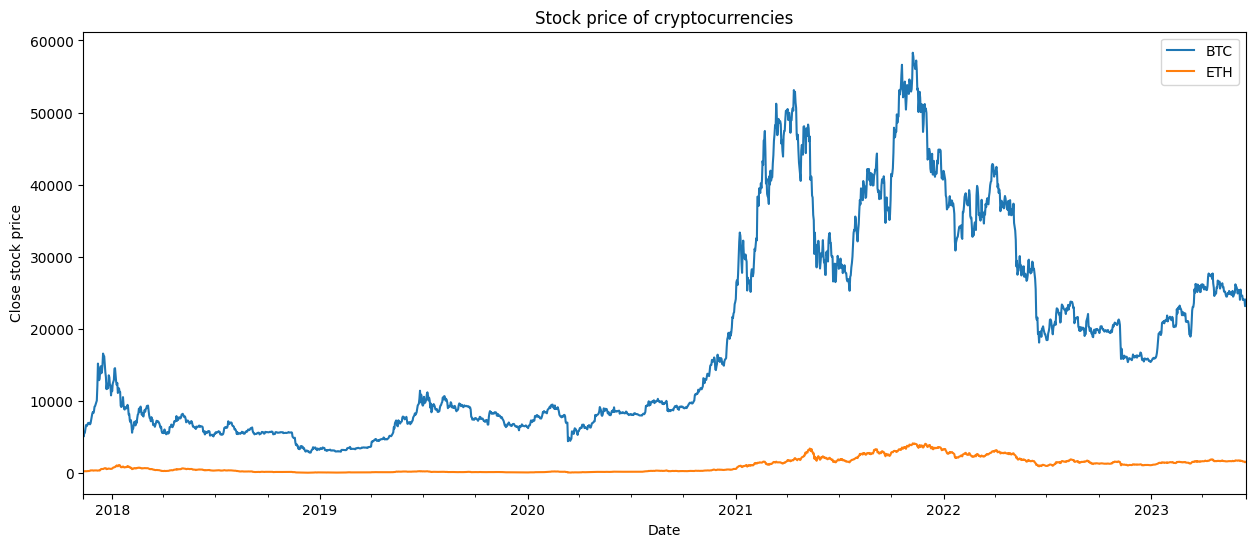

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Close_BTC"].plot(label = "BTC")
df["Close_ETH"].plot(label = "ETH")
plt.xlabel("Date")
plt.ylabel("Close stock price")
plt.title("Stock price of cryptocurrencies")
plt.legend()

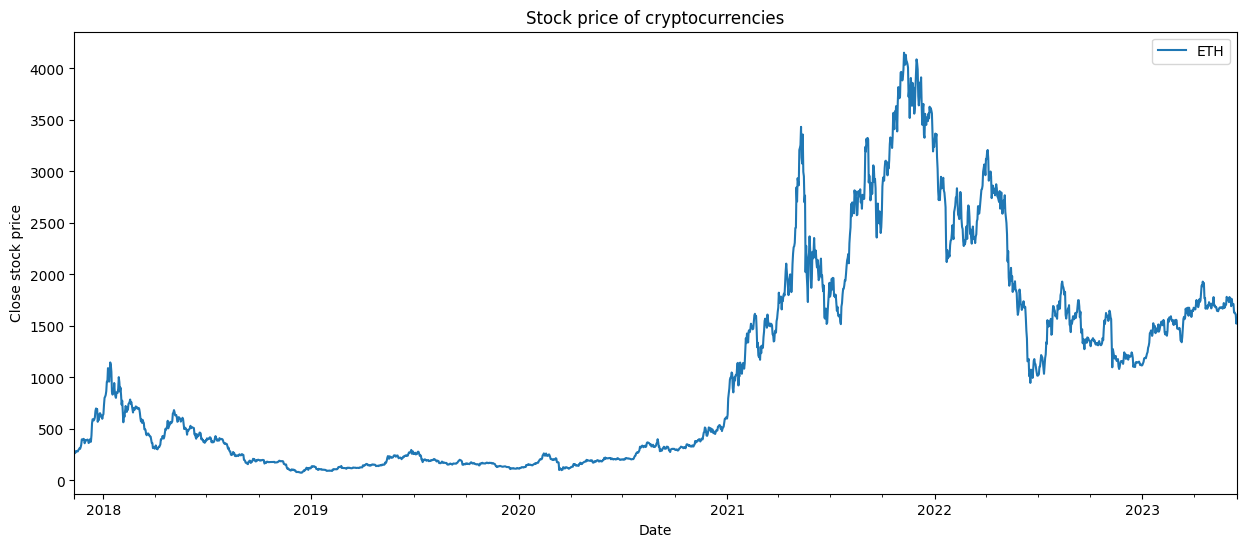

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Close_ETH"].plot(label = "ETH")
plt.xlabel("Date")
plt.ylabel("Close stock price")
plt.title("Stock price of cryptocurrencies")
plt.legend()

**Task 1.8:** Use `resample` method of pandas to show evolution of Bitcoin and Ethereum using month as unit of time
- [Resample pandas ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

<Axes: xlabel='Date'>

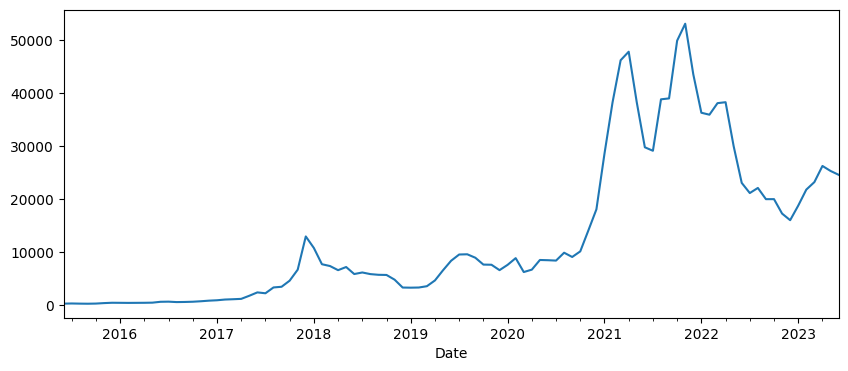

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
BTC["Close"].resample("1M").mean().plot()

<Axes: xlabel='Date'>

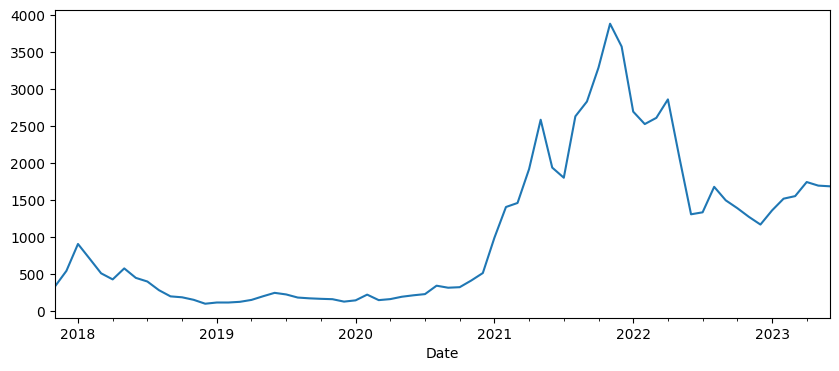

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
ETH["Close"].resample("1M").mean().plot()

### 2. Prediction of bitcoin stock price "at Close"

**Task 2.1:** Select a pandas series named `y` consisting of `Close`column for Bitcoin.

In [10]:
y = df["Close_BTC"]
y.head()

Date
2017-11-11    5451.084473
2017-11-12    5102.976074
2017-11-13    5624.187988
2017-11-14    5628.764160
2017-11-15    6209.081543
Name: Close_BTC, dtype: float64

**Task 2.2:** Create an ACF plot for the data in `y`. Be sure to label the x-axis as `"Lag [days]"` and the y-axis as `"Correlation Coefficient"`.
- [Plot ACF using statsmodels ](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)

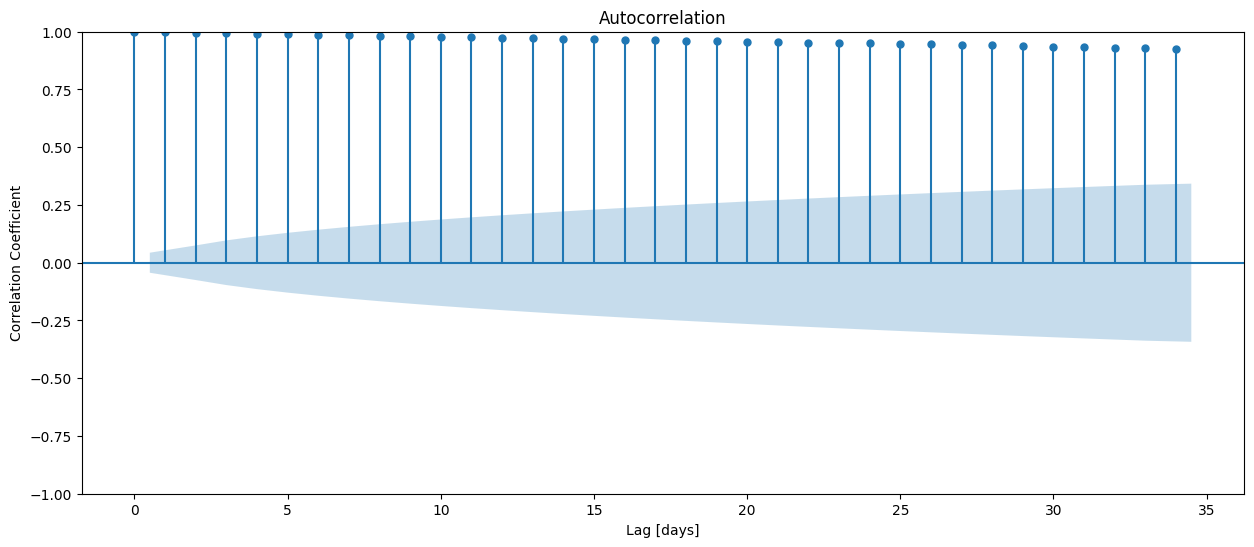

In [12]:
# Autocorrelation function
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y, ax = ax)

plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");
plt.show()

**Task 2.3:** Create an PACF plot for the data in `y`. Be sure to label the x-axis as `"Lag [days]"` and the y-axis as `"Correlation Coefficient"`.
- [Plot PACF using statsmodels ](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html)

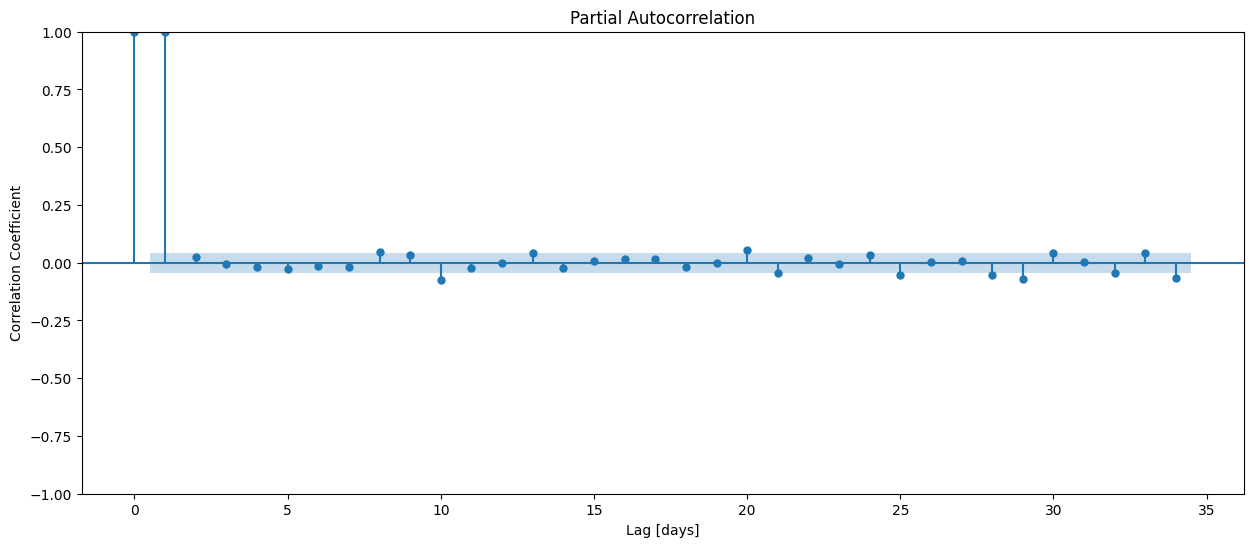

In [13]:
# Plotting the partial Autocorrelation function.

fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y, ax = ax)

plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");

#### Decompostion of time series 

In [14]:
# Decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


In [16]:
# frequency is the time a time serie is taking to complete on cycal
deco_model = df["Close_BTC"]
# additive_Tmodel_diff = deco_model.diff(10).dropna()   # for differentiation
ts_dicomposition = seasonal_decompose(x=deco_model, model= 'additive')
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

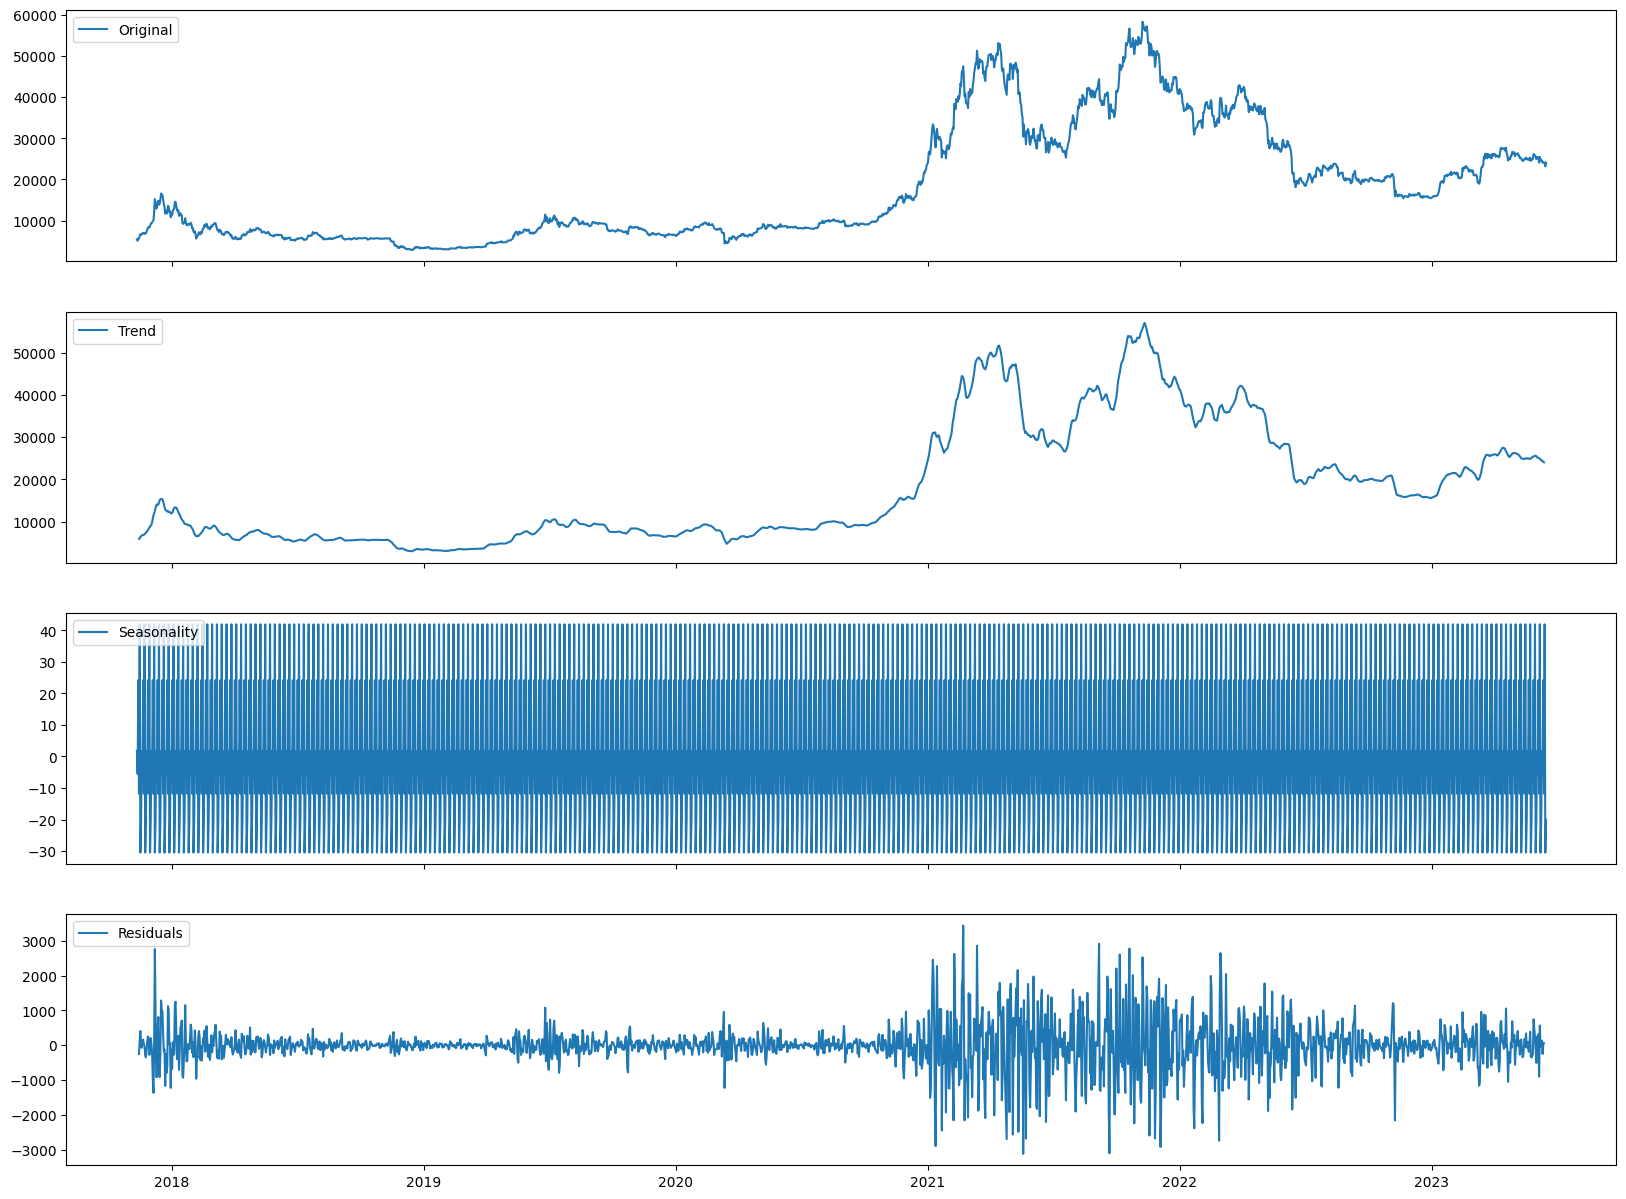

In [17]:
# Plotting the time series and it's components together
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(deco_model, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [18]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(deco_model)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -1.448973255586218            |
| P-valeur       | 0.5585858185322037            |
| Conclusion     | La série est non stationnaire |


In [19]:
# frequency is the time a time serie is taking to complete on cycal
deco_model = df["Close_BTC"]
deco_model_diff = deco_model.diff().dropna()   # for differentiation
ts_dicomposition = seasonal_decompose(x=deco_model_diff, model= 'additive')
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

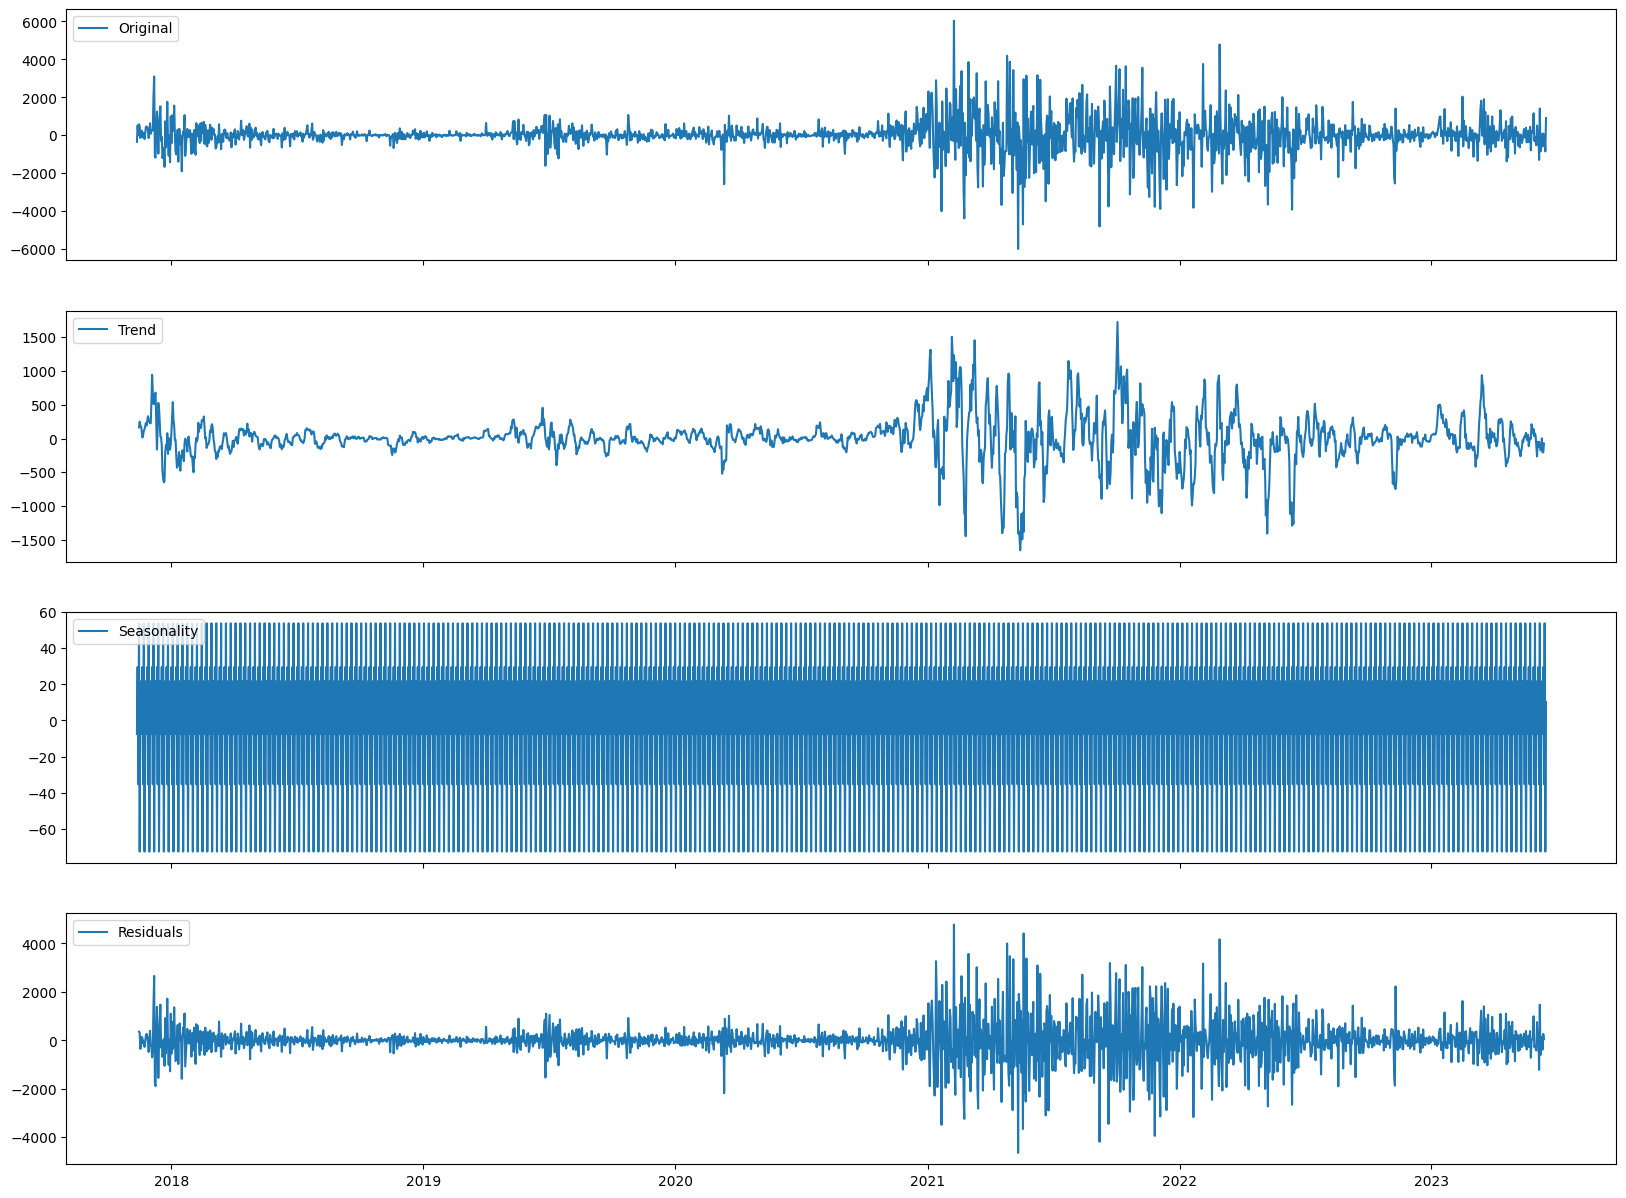

In [20]:
# Plotting the time series and it's components together
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(deco_model_diff, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [21]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(deco_model_diff)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -7.934497542976378        |
| P-valeur       | 3.442422992815494e-12     |
| Conclusion     | La série est stationnaire |


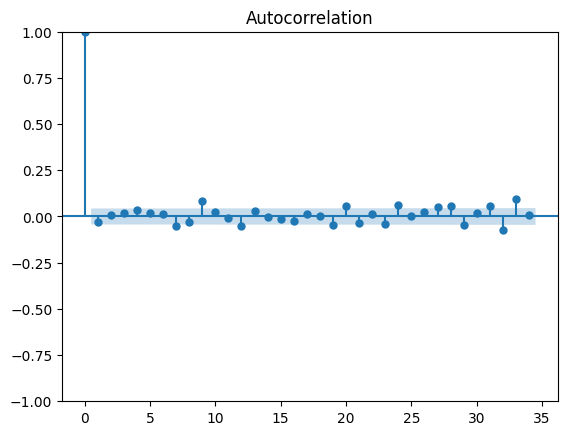

In [48]:
plot_acf(deco_model_diff);

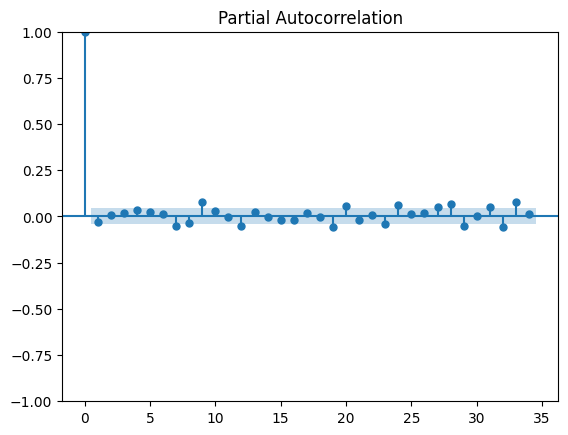

In [49]:
plot_pacf(deco_model_diff);

### Split data

**Task 2.4:** Split `y` into training and test sets. The first 95% of the data should be in your training set. The remaining 5% should be in the test set. Use `iloc` to split data.

In [25]:
cutoff = int(len(y)*0.95)

y_train = y.iloc[:cutoff]
y_test =  y.iloc[cutoff:]
print(len(y))
print(y_train.shape[0])
print(y_test.shape[0])
y_train.shape[0] + y_test.shape[0] == len(y)

2044
1941
103


True

### Building model Autoregressive time series model

**Task 2.5:** Calculate the baseline mean absolute error for your model. This is a difference between y_train and baseline prediction

In [31]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 17742.26
Baseline MAE: 12050.56


**Task 2.6:** Instantiate an [`AutoReg`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html) model and fit it to the training data `y_train`. Be sure to set the `lags` argument to `10`.

In [41]:
model = AutoReg(y_train, lags=1, old_names=False).fit()
model

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**Task 2.7:** Generate a list of training predictions for your model and use them to calculate your training mean absolute error.

In [42]:
y_pred =  model.predict().dropna()
training_mae = mean_absolute_error(y_train.loc[y_pred.index], y_pred)
print("Training MAE:", training_mae)

Training MAE: 473.7529926736154


**Task 2.8:** Use `y_train` and `y_pred` to calculate the residuals for your model.

In [44]:
y_train_resid = y_train - y_pred
y_train_resid.tail()

2023-03-01     279.167691
2023-03-02     -13.915356
2023-03-03   -1134.933766
2023-03-04     -10.462397
2023-03-05     106.639661
dtype: float64

**Task 2.9:** Create a plot of `y_train_resid`.

Text(0, 0.5, 'Residual')

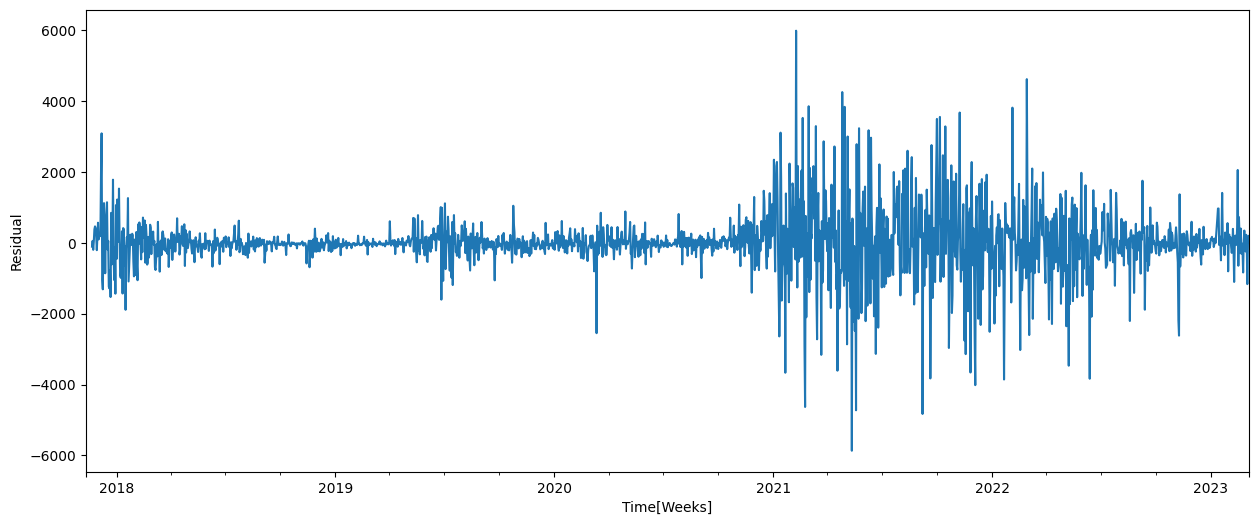

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
y_train_resid.plot(ax=ax)
plt.xlabel("Time[Weeks]")
plt.ylabel("Residual")

**Task 2.10:** Create a histogram of `y_train_resid`.

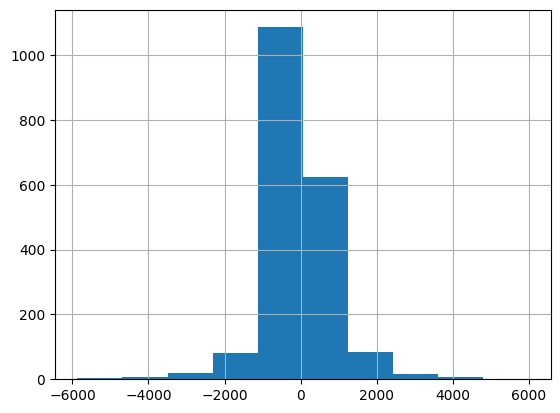

In [37]:
y_train_resid.hist();

**Task 2.11:** Create an ACF plot of `y_train_resid`.

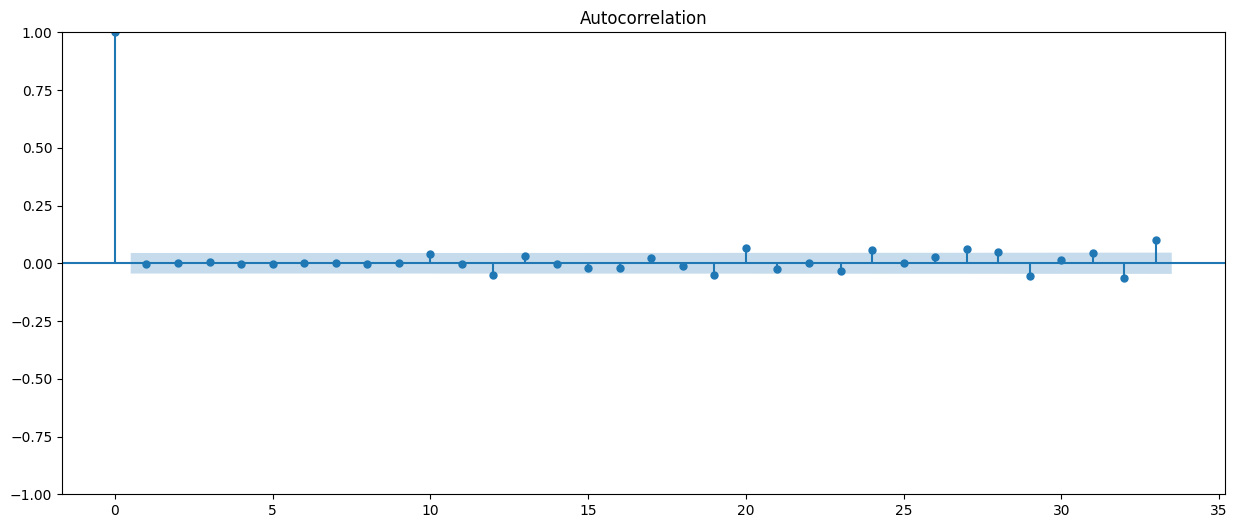

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid.dropna(), ax=ax);

### Evaluate

**Task 2.12:** Calculate the test mean absolute error for your model.

In [45]:
y_pred_test =  model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 4002.5023221501483


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


**Task 2.13:** Create a DataFrame `test_predictions` that has two columns: `"y_test"` and `"y_pred"`. The first should contain the true values for your test set, and the second should contain your model's predictions. Be sure the index of `test_predictions` matches the index of `y_test`.

In [47]:
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index
)
df_pred_test.head(10)

y_test        y_pred
Date                                  
2023-03-06  20988.779297  21115.674625
2023-03-07  21064.697266  21117.172498
2023-03-08  20587.609375  21118.667452
2023-03-09  19235.703125  21120.159494
2023-03-10  19235.703125  21121.648629
2023-03-11  18943.587891  21123.134863
2023-03-12  19379.527344  21124.618201
2023-03-13  20749.800781  21126.098649
2023-03-14  22565.941406  21127.576213
2023-03-15  23069.601563  21129.050897

**Task 2.14:** Create a time series plot for the values in `test_predictions` using plotly express. Be sure that the y-axis is properly labeled as `"Close price"`.

In [30]:
fig = px.line(df_pred_test, labels={"value": "Close price"})
fig.show()

Text(0, 0.5, 'Close price')

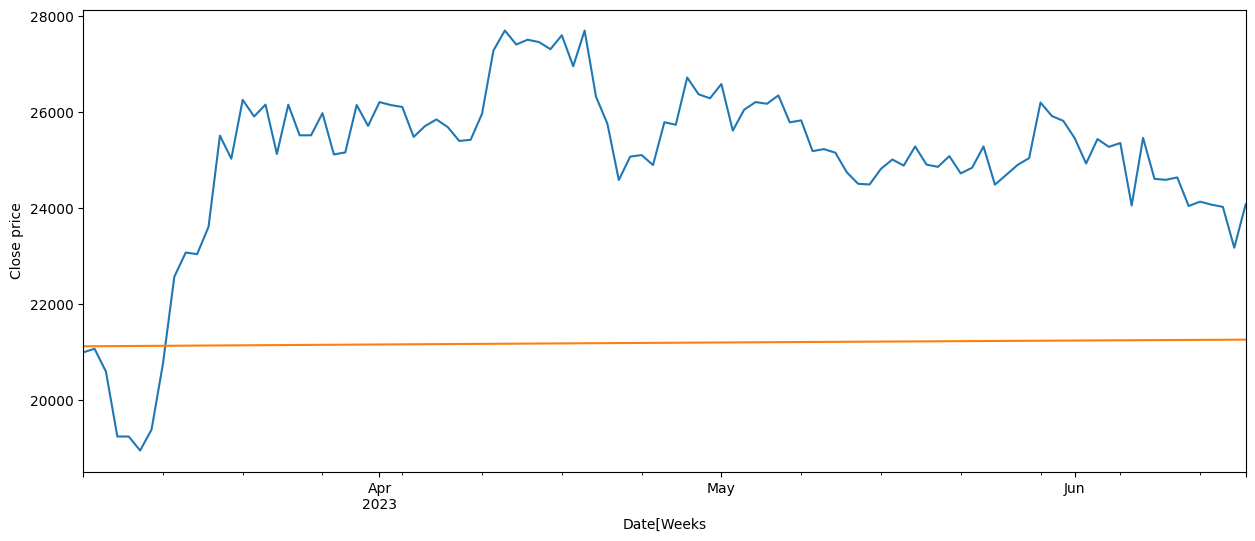

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
df_pred_test["y_test"].plot()
df_pred_test["y_pred"].plot()
plt.xlabel("Date[Weeks")
plt.ylabel("Close price")


**Task 2.15:** Perform walk-forward validation for your model for the entire test set `y_test`. Store your model's predictions in the Series `y_pred_wfv`.

In [50]:
%%capture

# First, we define a walk-forward variable
y_pred_wfv = pd.Series()
# Then, we define a variable that takes into account what's happened in the past
history = y_train.copy()
# The `for` loop tells the model what to do with those variables.
for i in range(len(y_test)):
    # Here's where we generate the actual AR model
    model = AutoReg(history, 1, old_names=False).fit()
    # Now we're using `forecast` to create our next prediction
    next_pred = model.forecast()
    # We're adding the next prediction to the list
    y_pred_wfv = y_pred_wfv._append(next_pred)
    # And finally updating `history` to take into account the new observation
    history = history._append(y_test[next_pred.index])

In [51]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 455.69


### Communicate 

**Task 2.16:** Print out the parameters for your trained model.)

In [52]:
print(model.params)

const           44.249179
Close_BTC.L1     0.998035
dtype: float64


In [54]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:              Close_BTC   No. Observations:                 2043
Model:                     AutoReg(1)   Log Likelihood              -16641.676
Method:               Conditional MLE   S.D. of innovations            837.780
Date:                Fri, 23 Jun 2023   AIC                          33289.352
Time:                        18:45:03   BIC                          33306.217
Sample:                    11-12-2017   HQIC                         33295.538
                         - 06-15-2023                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.2492     30.327      1.459      0.145     -15.191     103.690
Close_BTC.L1     0.9980      0.001    752.815      0.000       0.995       1.001
                                    Roots   

**Task 2.17:** Put the values for `y_test` and `y_pred_wfv` into the DataFrame `test_predictions` (don't forget the index). Then plot `df_pred_test` using plotly express.

In [79]:
test_predictions = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_wfv}, index=y_test.index
)


In [80]:
fig = px.line(test_predictions, labels={"value": "Close price"})
fig.show()

Text(0, 0.5, 'Close price')

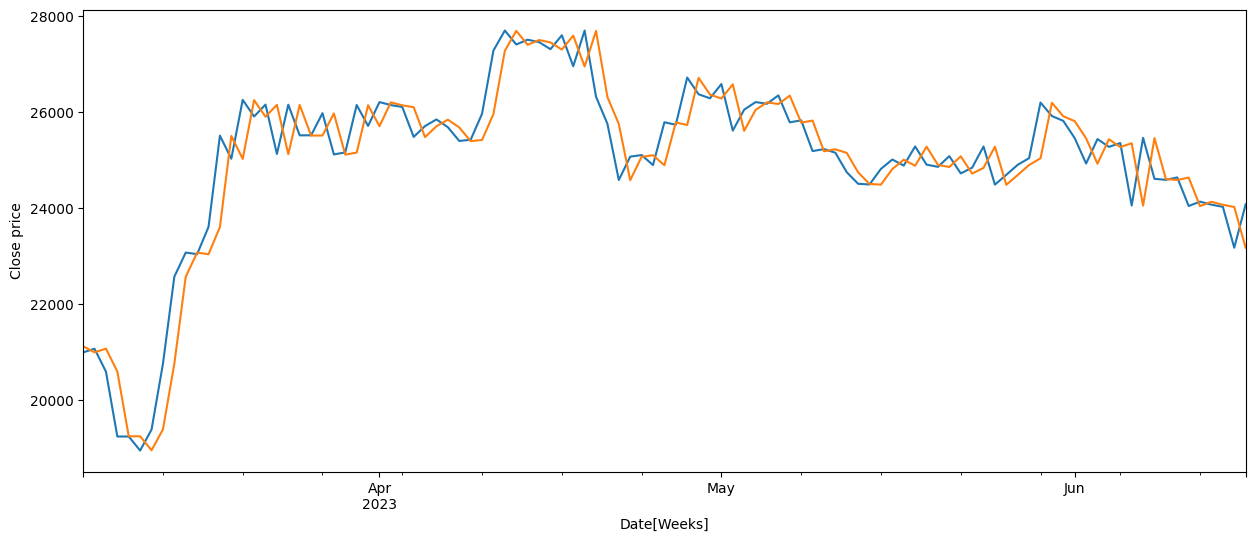

In [81]:
fig, ax = plt.subplots(figsize=(15, 6))
test_predictions["y_test"].plot()
test_predictions["y_pred"].plot()
plt.xlabel("Date[Weeks]")
plt.ylabel("Close price")

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
arma_model = ARIMA(df["Close_BTC"], order=(1, 1, 1)).fit()
print(arma_model.params)

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ar.L1         -0.119955
ma.L1          0.091480
sigma2    703242.711372
dtype: float64


In [40]:
print(arma_model.aic, arma_model.bic, arma_model.hqic)

33306.53954332145 33323.406067105905 33312.725913574744


In [41]:
print(model.aic, model.bic, model.hqic)

33289.3520260164 33306.217081012575 33295.53801085857


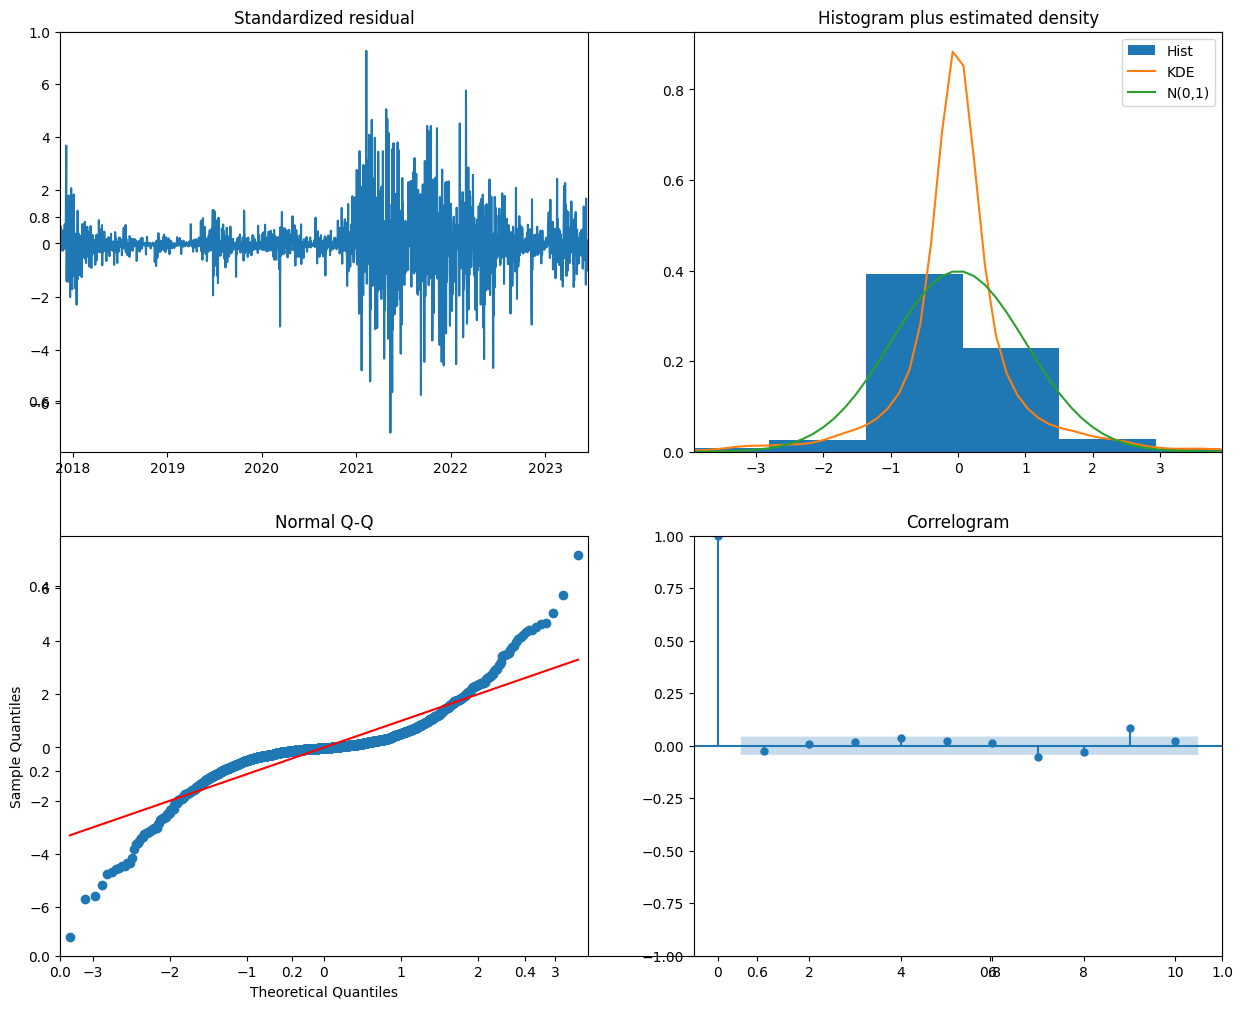

In [42]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig);

In [62]:
import inspect
import time
import warnings

p_params = range(0,25,8)
q_params = range(0,3,1)

# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 1, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(y_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        
        # Calculate training MAE
        mae = mean_absolute_error(y_train, y_pred)
        print(mae)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (0, 1, 0) in 0.28 seconds.
475.6883517928902
Trained ARIMA (0, 1, 1) in 0.05 seconds.
474.863854781224
Trained ARIMA (0, 1, 2) in 0.07 seconds.
474.9467320597505


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D 

Trained ARIMA (8, 1, 0) in 0.26 seconds.
475.4998945108639


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (8, 1, 1) in 0.88 seconds.
476.09171810073934


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (8, 1, 2) in 1.9 seconds.
477.574608233872


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (16, 1, 0) in 0.82 seconds.
478.0977426746912


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (16, 1, 1) in 2.62 seconds.
478.09064153620847


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (16, 1, 2) in 8.61 seconds.
479.49301032275247


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (24, 1, 0) in 2.28 seconds.
479.2964251618152


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (24, 1, 1) in 7.16 seconds.
478.8174859239024


C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Trained ARIMA (24, 1, 2) in 9.09 seconds.
479.3720196242109

{0: [475.6883517928902, 474.863854781224, 474.9467320597505], 8: [475.4998945108639, 476.09171810073934, 477.574608233872], 16: [478.0977426746912, 478.09064153620847, 479.49301032275247], 24: [479.2964251618152, 478.8174859239024, 479.3720196242109]}


In [63]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

0         8         16        24
0  475.6884  475.4999  478.0977  479.2964
1  474.8639  476.0917  478.0906  478.8175
2  474.9467  477.5746  479.4930  479.3720

Text(0.5, 1.0, 'ARMA grid search: MAE criterion')

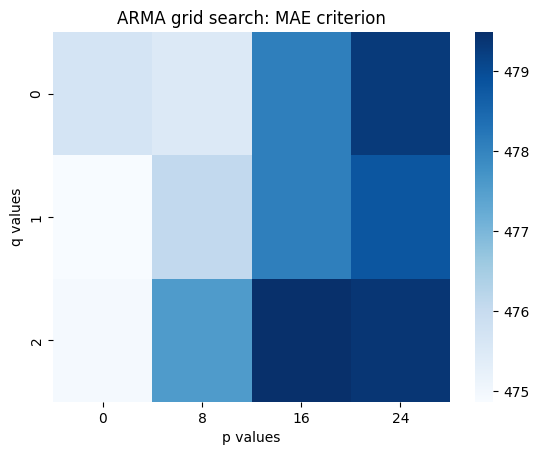

In [64]:
import seaborn as sns
sns.heatmap(mae_df, cmap = "Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARMA grid search: MAE criterion")

In [60]:
# Créer un modèle ARIMA(2,1,1)
model = ARIMA(y_train, order=(8,1,1))

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DDD\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Close_BTC   No. Observations:                 1941
Model:                 ARIMA(8, 1, 1)   Log Likelihood              -15823.695
Date:                Fri, 23 Jun 2023   AIC                          31667.391
Time:                        18:55:16   BIC                          31723.095
Sample:                    11-11-2017   HQIC                         31687.876
                         - 03-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7298      0.104     -7.002      0.000      -0.934      -0.525
ar.L2         -0.0140      0.019     -0.725      0.469      -0.052       0.024
ar.L3          0.0249      0.019      1.336      0.1

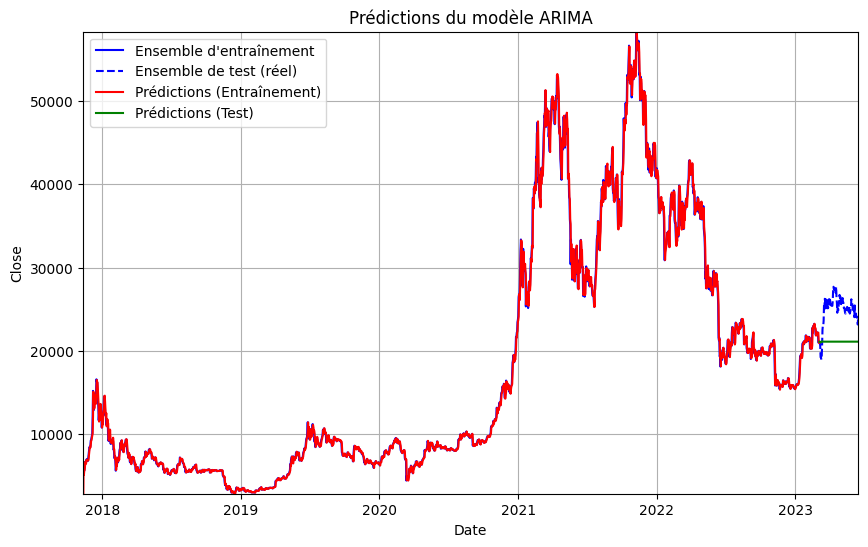

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Prédictions sur l'ensemble d'entraînement
train_predictions = model_fit.predict(start=y_train.index[0], end= y_train.index[-1])

# Prédictions sur l'ensemble de test
test_predictions = model_fit.predict(start=y_test.index[0], end=y_test.index[-1])

# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(y_test.index, y_test.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(train_predictions.index, train_predictions, label='Prédictions (Entraînement)', color='red')
plt.plot(test_predictions.index, test_predictions, label='Prédictions (Test)', color='green')

# Définir les limites des axes x et y pour une continuité visuelle
plt.xlim(y_train.index[0], y_test.index[-1])
plt.ylim(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()))

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Mesures de performance sur l'ensemble d'entraînement
train_data = y_train.copy()
test_data = y_test.copy()
train_mae = mean_absolute_error(train_data, train_predictions)
train_mse = mean_squared_error(train_data, train_predictions)
train_rmse = mean_squared_error(train_data, train_predictions, squared=False)
train_r2 = r2_score(train_data, train_predictions)

# Mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, test_predictions)
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)
test_r2 = r2_score(test_data, test_predictions)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse, train_r2],
    'Ensemble de test': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)

  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE               476.091718      4.074670e+03
1      MSE            726458.702376      1.840372e+07
2     RMSE               852.325467      4.289955e+03
3       R²                 0.996420     -4.868404e+00


In [65]:
# Auto ARIMA
#!pip install pmdarima
import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
#train_data = df['Passengers'][:-15]
#test_data = df['Passengers'][-15:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(y_train)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1941
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -15823.347
Date:                Fri, 23 Jun 2023   AIC                          31658.694
Time:                        18:56:34   BIC                          31692.117
Sample:                    11-11-2017   HQIC                         31670.985
                         - 03-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.4723     20.123      0.322      0.748     -32.968      45.913
ar.L1          0.9268      0.011     83.925      0.000       0.905       0.948
ar.L2         -0.9467      0.011    -85.114      0.0

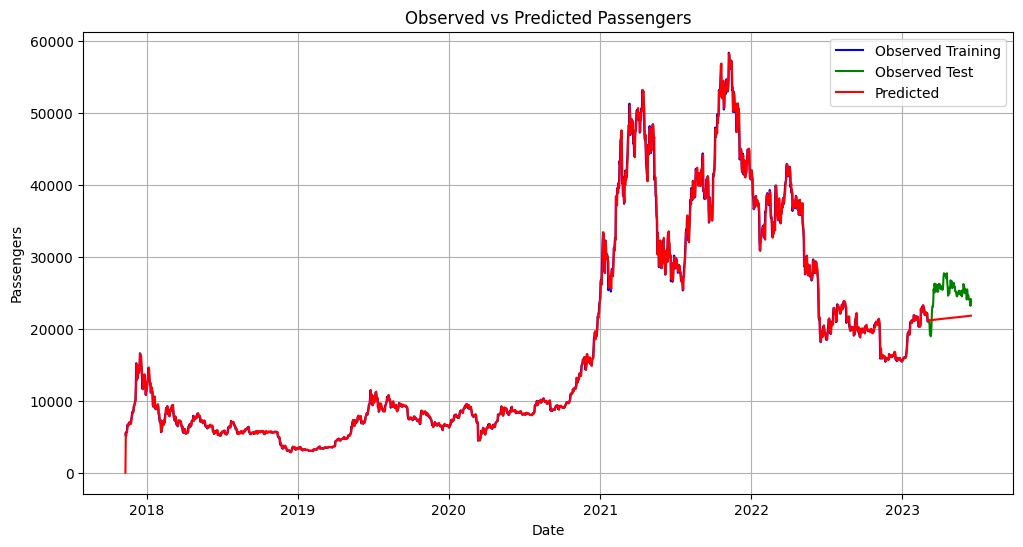

In [68]:
# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Observed vs Predicted Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
def wrangle (url):
    df = pd.read_csv(url, sep = ";")
    # key columns
    key_col = ["date_ini","sexcode",  "agecode", "weigt", "typpat", 
               "Diag", "TBsite", "ISSTrait", "RVIH", "lieusuivi"]
    # df with keys columns
    df = df[key_col]
    # drop rows with missing values
    df.dropna (inplace = True)

    ## create Year and month columns
    df["year"] = df["date_ini"].str.split("/", expand = True)[2]
    df["sub_month"] = df["date_ini"].str.split("/", expand = True)[1]
    df["month"] = df["year"] + "/"+ df["sub_month"]
    df["month"] = pd.to_datetime(df["month"])
    #df["month"].dt.strftime('%Y/%m')
    
    # change datdb in date format Year, month, day
    df["date_ini"] = pd.to_datetime(df["date_ini"], dayfirst=True)
    df["date_ini"].dt.strftime('%Y/%m/%d')
    
    # sorting date column
    df.sort_values(by='date_ini', ascending = True, inplace = True)
    
    # set datdb as index
    df.set_index("date_ini", inplace = True)
    
    # create outcome column with unfavorable outcome = 1 and treatment success =  and 
      ## create new modalities
    df["sexcode"] = df["sexcode"].replace([1, 2], ["homme", "femme"]) 
    df["typpat"] = df["typpat"].replace([1, 2, 3], ["nouveau cas", "retraitement", "autre"]) 
    df["Diag"] = df["Diag"].replace(["B", "C"], ["bacteriologique", "clinique"]) 
    df["TBsite"] = df["TBsite"].replace([1, 2, 3], ["pulmonaire", "extrapulmonaire", "extrapulmonaire"]) # multicale classify as extra
    
    df["outcome"] = df["ISSTrait"].replace([2, 1, 7, 4, 5, 6, 3, 8], [0, 0, 2, 2, 1, 2, 2, 2]) 
    df["RVIH"] = df["RVIH"].replace(['CP', 'NG', 'NF', 'ID', 'NP'], ["positif", "negatif", "non connu", "non connu", "positif"])
    df["lieusuivi"] = df["lieusuivi"].replace([1, 2, 3], ["ambulatoire", "hospitalisation", "non connu"]) 
      ## choose rows with 0 and 1
    df = df.loc[df["outcome"] !=2]

    mask_age = df["agecode"] >= 15
    df = df[mask_age]
    
    # drop ISSTrait column
    df.drop(columns = ["ISSTrait"], inplace = True)
    return df 

In [105]:
url = "C:/Users/DDD/Documents/ARTICLES_THESES_RECONSTITUTION/Dombu_reine/outcome_dombu_2001_2020.csv"
df = wrangle (url)
df.info()

C:\Users\DDD\AppData\Local\Temp\ipykernel_25700\4280179270.py:2: DtypeWarning:

Columns (28,31,39) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\DDD\AppData\Local\Temp\ipykernel_25700\4280179270.py:15: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22244 entries, 2001-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   sexcode    22244 non-null  object        
 1   agecode    22244 non-null  float64       
 2   weigt      22244 non-null  float64       
 3   typpat     22244 non-null  object        
 4   Diag       22244 non-null  object        
 5   TBsite     22244 non-null  object        
 6   RVIH       22244 non-null  object        
 7   lieusuivi  22244 non-null  object        
 8   year       22244 non-null  object        
 9   sub_month  22244 non-null  object        
 10  month      22244 non-null  datetime64[ns]
 11  outcome    22244 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 2.2+ MB


In [148]:
 df["total"] = df["outcome"].replace([0, 1], [1, 1]) 
 df["total"]

date_ini
2001-01-01    1.0
2001-01-02    1.0
2001-01-03    1.0
2001-01-03    1.0
2001-01-05    1.0
             ... 
2020-12-30    1.0
2020-12-30    1.0
2020-12-31    1.0
2020-12-31    1.0
2020-12-31    1.0
Name: total, Length: 22244, dtype: float64

In [152]:
y = df["total"].resample("M").sum()
y

date_ini
2001-01-31    70.0
2001-02-28    45.0
2001-03-31    77.0
2001-04-30    66.0
2001-05-31    64.0
              ... 
2020-08-31    42.0
2020-09-30    41.0
2020-10-31    70.0
2020-11-30    61.0
2020-12-31    64.0
Freq: M, Name: total, Length: 240, dtype: float64

In [115]:
df_month = df["month"].value_counts()
y = df_month.copy()
y.index = pd.to_datetime(y.index)
y

month
2011-02-01    212
2005-04-01    181
2005-02-01    167
2005-03-01    162
2006-03-01    162
             ... 
2020-09-01     41
2009-12-01     39
2016-11-01     38
2011-01-01     25
2013-12-01      8
Name: count, Length: 240, dtype: int64

In [153]:
cutoff = int(len(y)*0.90)

y_train = y.iloc[:cutoff]
y_test =  y.iloc[cutoff:]
print(len(y))
print(y_train.shape[0])
print(y_test.shape[0])
y_train.shape[0] + y_test.shape[0] == len(y)

240
216
24


True

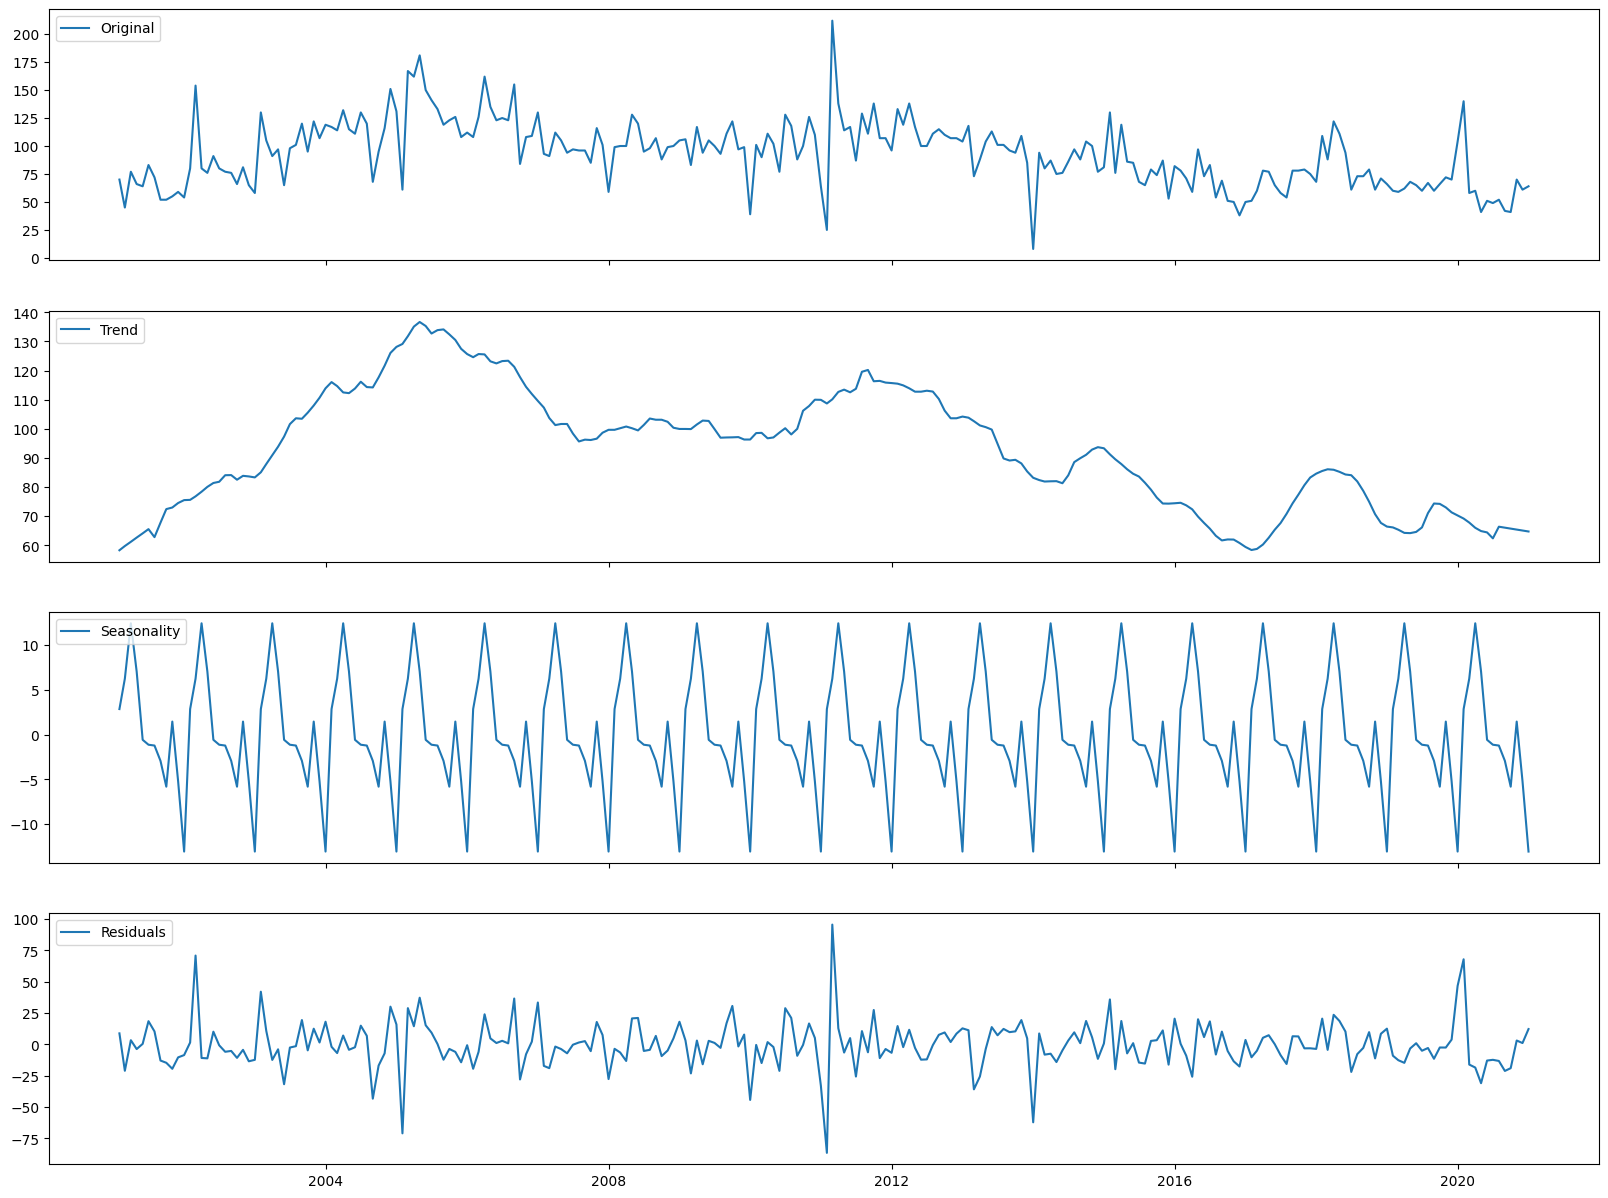

In [154]:
# frequency is the time a time serie is taking to complete on cycal
deco_model = y.copy()
# additive_Tmodel_diff = deco_model.diff(10).dropna()   # for differentiation
ts_dicomposition = seasonal_decompose(x=deco_model, model= 'additive',  extrapolate_trend=12)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

# Plotting the time series and it's components together
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(deco_model, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

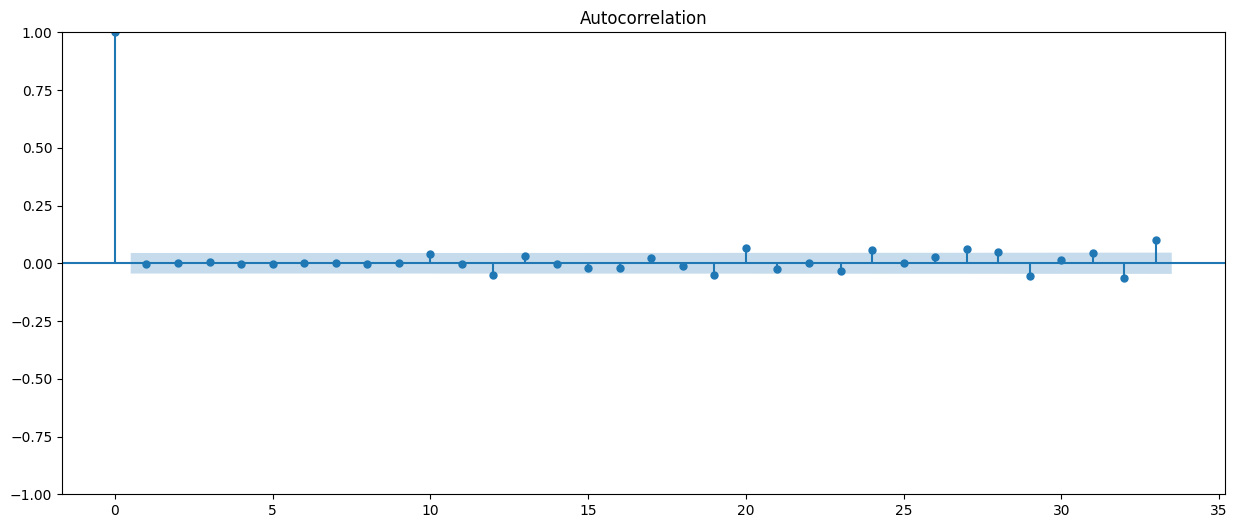

In [155]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid.dropna(), ax=ax);

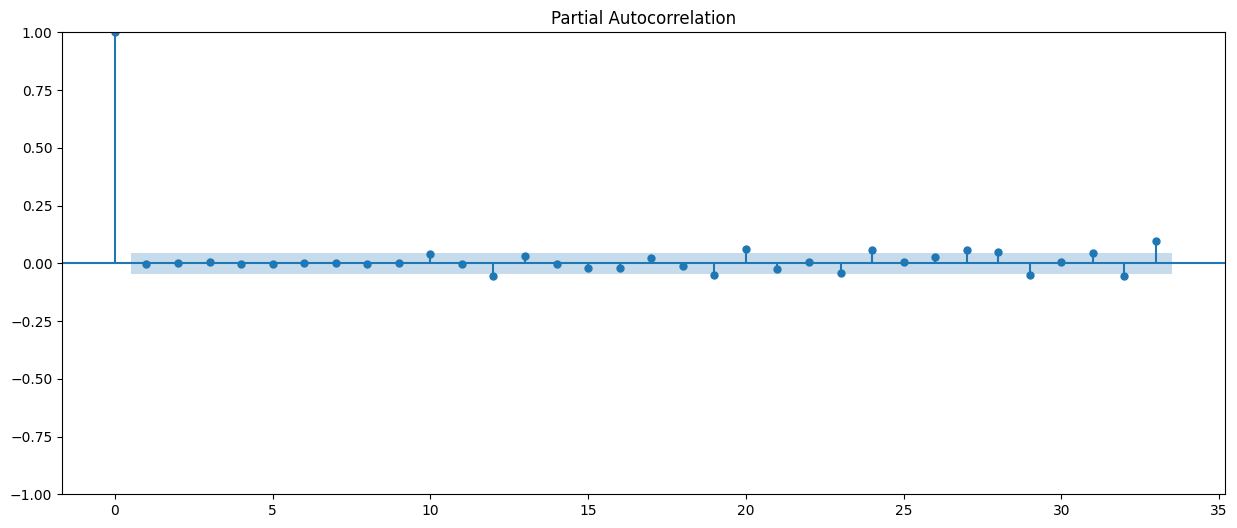

In [156]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y_train_resid.dropna(), ax=ax);

In [157]:
# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(y)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | -2.7851899367992377           |
| P-valeur       | 0.06042061960050946           |
| Conclusion     | La série est non stationnaire |


In [160]:
# frequency is the time a time serie is taking to complete on cycal

y_diff = y.diff().dropna()   # for differentiation
ts_dicomposition = seasonal_decompose(x=y_diff, model= 'additive')
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

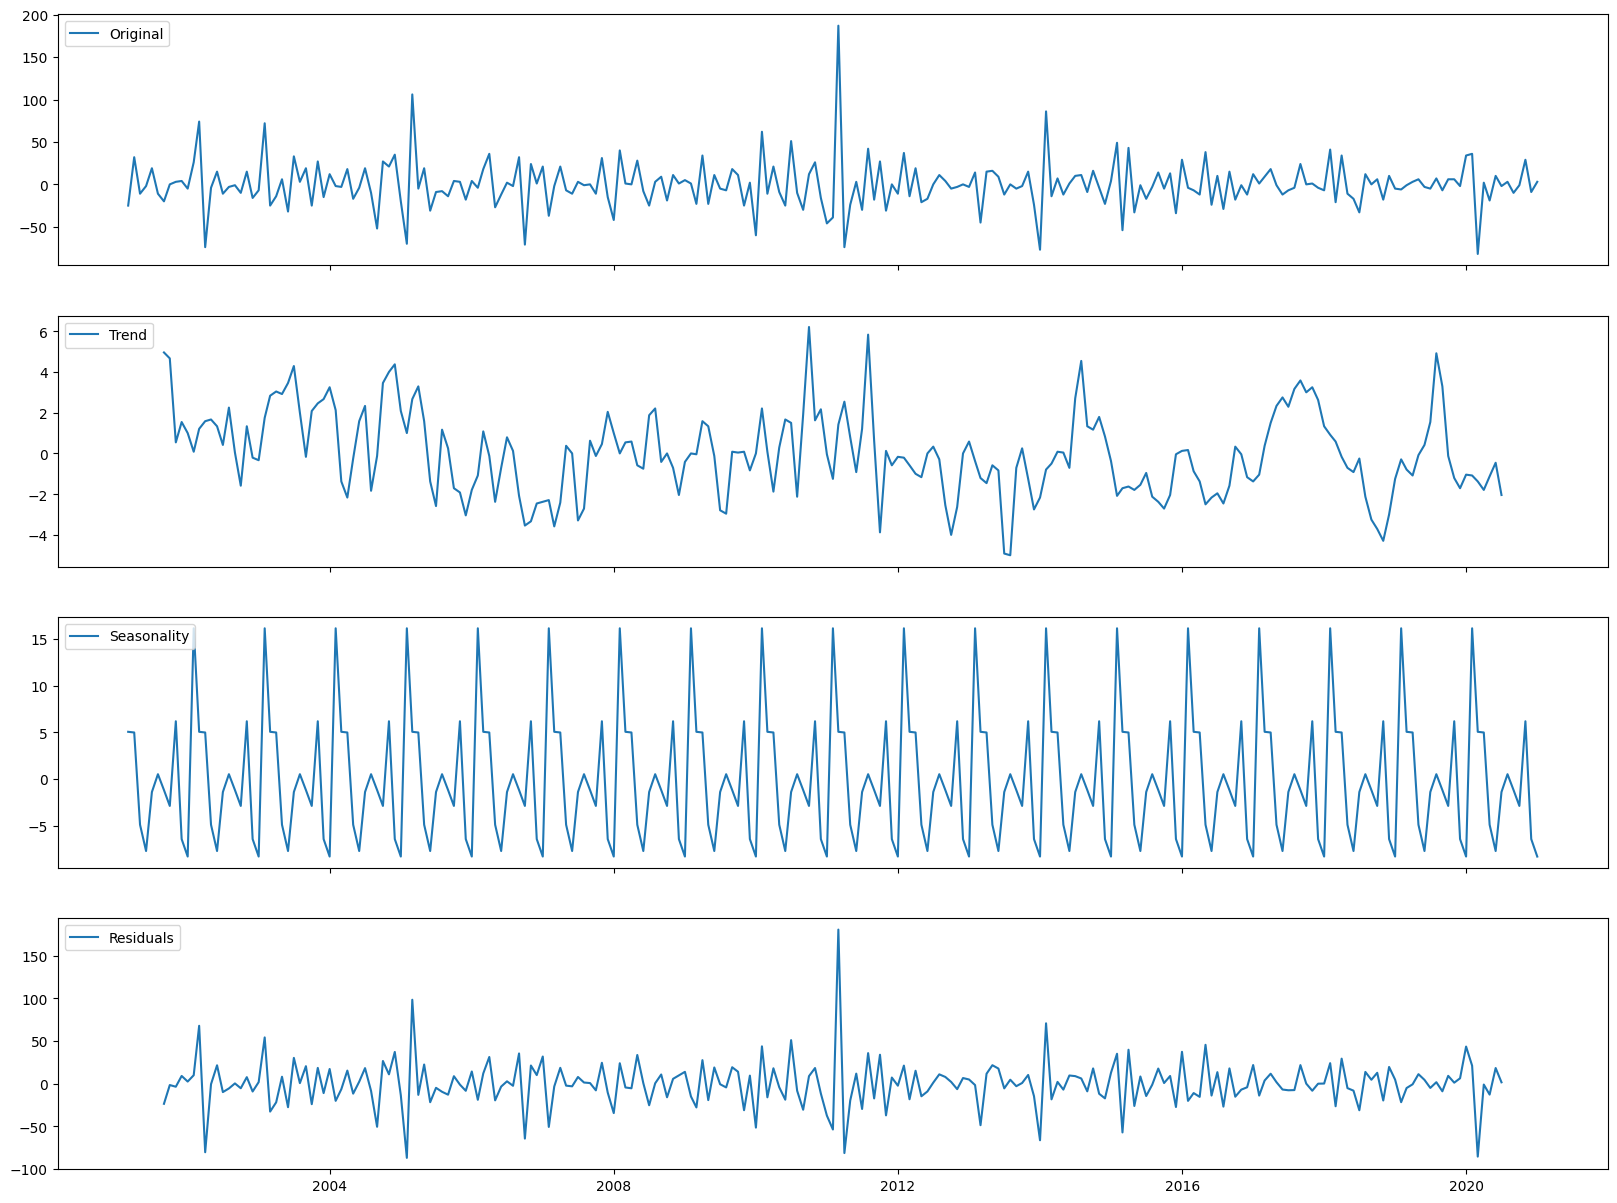

In [161]:
# Plotting the time series and it's components together
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(y_diff, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [162]:
# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(y_diff)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -8.041235267071166        |
| P-valeur       | 1.8446620420174626e-12    |
| Conclusion     | La série est stationnaire |
